In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import *

In [4]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
sub=pd.read_csv('sampleSubmission.csv')

In [5]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

### 가장 간단한 모델 만들기
* 머신에게 입력데이터와 출력이 나온다
    * 분리해서 학습시킨다(x_train, y_train, x_test)
    * 머신러닝 모델 선택
    * 생성된 모델에 데이터 입력하여 학습
    * 학습시킨 모델에 새로운 데이터 입력해 출력 예측
    * sub에 count와 y_test 써서 제출

In [7]:
sel = ['windspeed','atemp','workingday','humidity']
x_train=train[sel]
y_train=train['count']

In [8]:
x_test = test[sel]

In [14]:
# 머신러닝 모델 선택 - 회귀 모형을 선택하겠다
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression() # 모델 선택, 머신 생성
# model.fit(입력, 출력)  # 학습용 데이터셋 이용
model.fit(x_train, y_train)

LinearRegression()

In [16]:
print(model.coef_) # 회귀계수
print(model.intercept_) #절편

[ 0.6311105   8.10534236 -2.79547888  3.65502477]
159.58164794307152


* y(렌탈 대수 = 26.71*x1(날씨) + -37.18*2(날씨))

In [17]:
pre=model.predict(x_test) # 새로운 데이터에 대한 count 예측

In [18]:
len(pre)

6493

In [19]:
sub['count']=pre
sub.loc[sub['count']<0,'count']=0
sub.to_csv('4thSub.csv', index=False)

### 결과를 통해 알게 된 내용
* 특징(feature)이 많다고 반드시 더 좋은 모델이 나오는것은 아니다.

### 수업 범위 외 추가내용

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

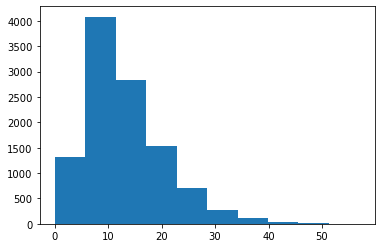

In [21]:
plt.hist(train['windspeed'])

In [22]:
train.windspeed.describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

### 5분 실습
1. 풍속을 중앙값으로 대체시켜 모델 생성
2. 풍속을 전의값으로 대체시켜 모델 만들기

In [23]:
len(train.loc[train['windspeed']==0, ])

1313

In [24]:
import numpy as np

In [25]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [26]:
sel = ['windspeed','atemp','humidity','weather']
x_train=train[sel]
y_train=train['count']

x_test = test[sel]

In [27]:
model = LinearRegression() # 모델 선택, 머신 생성
# model.fit(입력, 출력)  # 학습용 데이터셋 이용
model.fit(x_train, y_train)

LinearRegression()

In [28]:
print(model.coef_) # 회귀계수
print(model.intercept_) #절편

[ 0.6311105   8.10534236 -2.79547888  3.65502477]
159.58164794307152


In [29]:
pre=model.predict(x_test) # 새로운 데이터에 대한 count 예측

In [30]:
sub['count']=pre
sub.loc[sub['count']<0,'count']=sub.loc[sub['count']<0,'count']*-1
sub.to_csv('6thSub.csv', index=False)